# Exploring Dandiset 001363: Neural Spiking Data in the Rat Somatosensory Cortex

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview
In this study, we investigate the neuronal response to transcranial focused ultrasound stimulation (tFUS) on the somatosensory cortex using a 128-element array transducer and a chronically implanted ultraflexible nanoelectric thread electrode.

- Dandiset ID: 001363
- Version: Draft
- Access: Open
- License: CC-BY-4.0
- Researchers: Sandhya Ramachandran, Huan Gao, et al.
- [Explore in Neurosift](https://neurosift.app/dandiset/001363)

## What this Notebook Covers
- Loading the Dandiset data using the DANDI API.
- Exploring and visualizing NWB data files.
- Analyzing specific data points and metadata.

## Required Packages
Ensure you have the following packages before proceeding:
- dandi
- pynwb
- h5py
- matplotlib
- pandas

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import pandas as pd

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())

# Show assets
print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 55 assets in the dataset

First 5 assets:
- sub-BH643/sub-BH643_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T182204_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T174647_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T195303_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T180423_ecephys.nwb


## Load Specific NWB File and Display Metadata
We will load the NWB file from `sub-BH589/sub-BH589_ses-20240827T160457_ecephys.nwb`.

In [2]:
# URL to the NWB file
url = "https://api.dandiarchive.org/api/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/download/"
# Load the NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display basic metadata
print("NWB Session Description:", nwb.session_description)
print("NWB Identifier:", nwb.identifier)
print("Session Start Time:", nwb.session_start_time)

NWB Session Description: Rat Ultrasound Array Stimulation
NWB Identifier: BH589_1500_200_67_25V
Session Start Time: 2024-08-27 16:04:57-04:00


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Visualize Electrophysiology Data

Acquisition Comments: no comments
Acquisition Description: no description


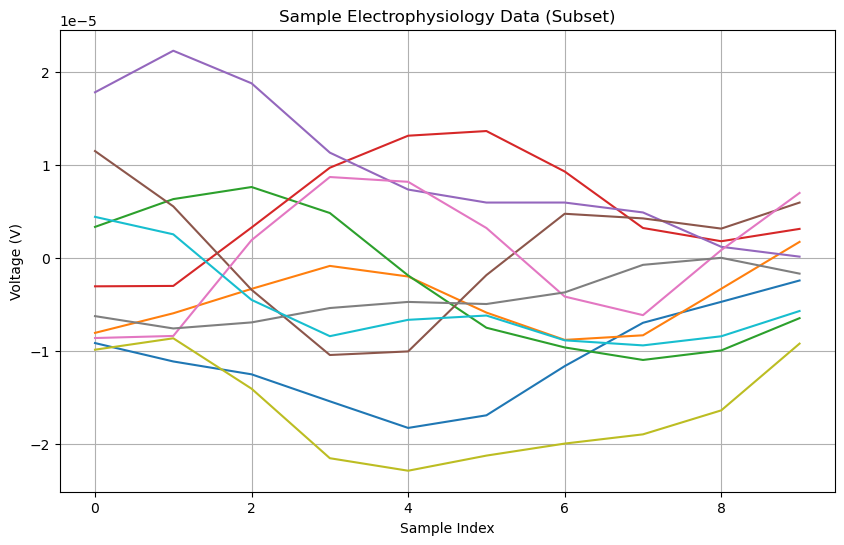

In [3]:
# Extracting ElectricalSeries data
electrical_series = nwb.acquisition["ElectricalSeries"]

# Display basic info
print("Acquisition Comments:", electrical_series.comments)
print("Acquisition Description:", electrical_series.description)

# Visualize a subset of data
data = electrical_series.data[0:10, :10]  # First 10 samples, first 10 channels
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Sample Electrophysiology Data (Subset)")
plt.xlabel("Sample Index")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.show()

## Explore Electrode Metadata

In [4]:
# Convert electrode table to DataFrame
electrodes_df = nwb.electrodes.to_dataframe()

# Display first rows
print(electrodes_df.head())

        x      y    z  imp location filtering  \
id                                              
0   24.73    0.0  0.0  NaN  unknown   unknown   
1    0.00   25.0  0.0  NaN  unknown   unknown   
2   24.73   50.0  0.0  NaN  unknown   unknown   
3    0.00   75.0  0.0  NaN  unknown   unknown   
4   24.73  100.0  0.0  NaN  unknown   unknown   

                                                group   group_name  
id                                                                  
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x13997...  shank1elec1  
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x13997...  shank1elec2  
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x13997...  shank1elec3  
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x13997...  shank1elec4  
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x13997...  shank1elec5  


## Findings and Future Directions
This notebook has outlined the methods to load and visualize data from the NWB file. Future work could involve deeper analysis of spike activities and synchronization patterns, requiring dedicated computational tools.

io.close()  # Properly close the file to release resources